In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scikit_posthocs as sp

In [4]:
data_19SC1 = pd.read_excel("anova.xlsx", sheet_name="19SC1")
data_19SC1["R$^2$"] = data_19SC1["R2"]
data_19SC1.drop(columns="R2", inplace=True)

data_19SC2 = pd.read_excel("anova.xlsx", sheet_name="19SC2")
data_19SC2["R$^2$"] = data_19SC2["R2"]
data_19SC2.drop(columns="R2", inplace=True)

data_08SC = pd.read_excel("anova.xlsx", sheet_name="08SC")
data_08SC["R$^2$"] = data_08SC["R2"]
data_08SC.drop(columns="R2", inplace=True)

Distribution Visualization

In [5]:
def viz_dist(data):
    fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(10, 13))

    sns.histplot(data[data["Model"] == "XGBoost"], x="RMSE", bins=20, ax=axs[0][0], kde=True)
    sns.histplot(data[data["Model"] == "XGBoost"], x="R$^2$", bins=20, ax=axs[0][1], kde=True)
    axs[0][0].set_title("XGBoost RMSE")
    axs[0][1].set_title("XGBoost R$^2$")

    sns.histplot(data[data["Model"] == "GCN"], x="RMSE", bins=20, ax=axs[1][0], kde=True)
    sns.histplot(data[data["Model"] == "GCN"], x="R$^2$", bins=20, ax=axs[1][1], kde=True)
    axs[1][0].set_title("GCN RMSE")
    axs[1][1].set_title("GCN R$^2$")

    sns.histplot(data[data["Model"] == "GAT"], x="RMSE", bins=20, ax=axs[2][0], kde=True)
    sns.histplot(data[data["Model"] == "GAT"], x="R$^2$", bins=20, ax=axs[2][1], kde=True)
    axs[2][0].set_title("GAT RMSE")
    axs[2][1].set_title("GAT R$^2$")

    sns.histplot(data[data["Model"] == "GATv2"], x="RMSE", bins=20, ax=axs[3][0], kde=True)
    sns.histplot(data[data["Model"] == "GATv2"], x="R$^2$", bins=20, ax=axs[3][1], kde=True)
    axs[3][0].set_title("GATv2 RMSE")
    axs[3][1].set_title("GATv2 R$^2$")

    sns.histplot(data[data["Model"] == "AttentiveFP"], x="RMSE", bins=20, ax=axs[4][0], kde=True)
    sns.histplot(data[data["Model"] == "AttentiveFP"], x="R$^2$", bins=20, ax=axs[4][1], kde=True)
    axs[4][0].set_title("AttentiveFP RMSE")
    axs[4][1].set_title("AttentiveFP R$^2$")

    sns.histplot(data[data["Model"] == "LightGBM"], x="RMSE", bins=20, ax=axs[5][0], kde=True)
    sns.histplot(data[data["Model"] == "LightGBM"], x="R$^2$", bins=20, ax=axs[5][1], kde=True)
    axs[5][0].set_title("LightGBM RMSE")
    axs[5][1].set_title("LightGBM R$^2$")

    sns.histplot(data[data["Model"] == "1dCNN"], x="RMSE", bins=20, ax=axs[6][0], kde=True)
    sns.histplot(data[data["Model"] == "1dCNN"], x="R$^2$", bins=20, ax=axs[6][1], kde=True)
    axs[6][0].set_title("1DCNN RMSE")
    axs[6][1].set_title("1DCNN R$^2$")

    plt.tight_layout()

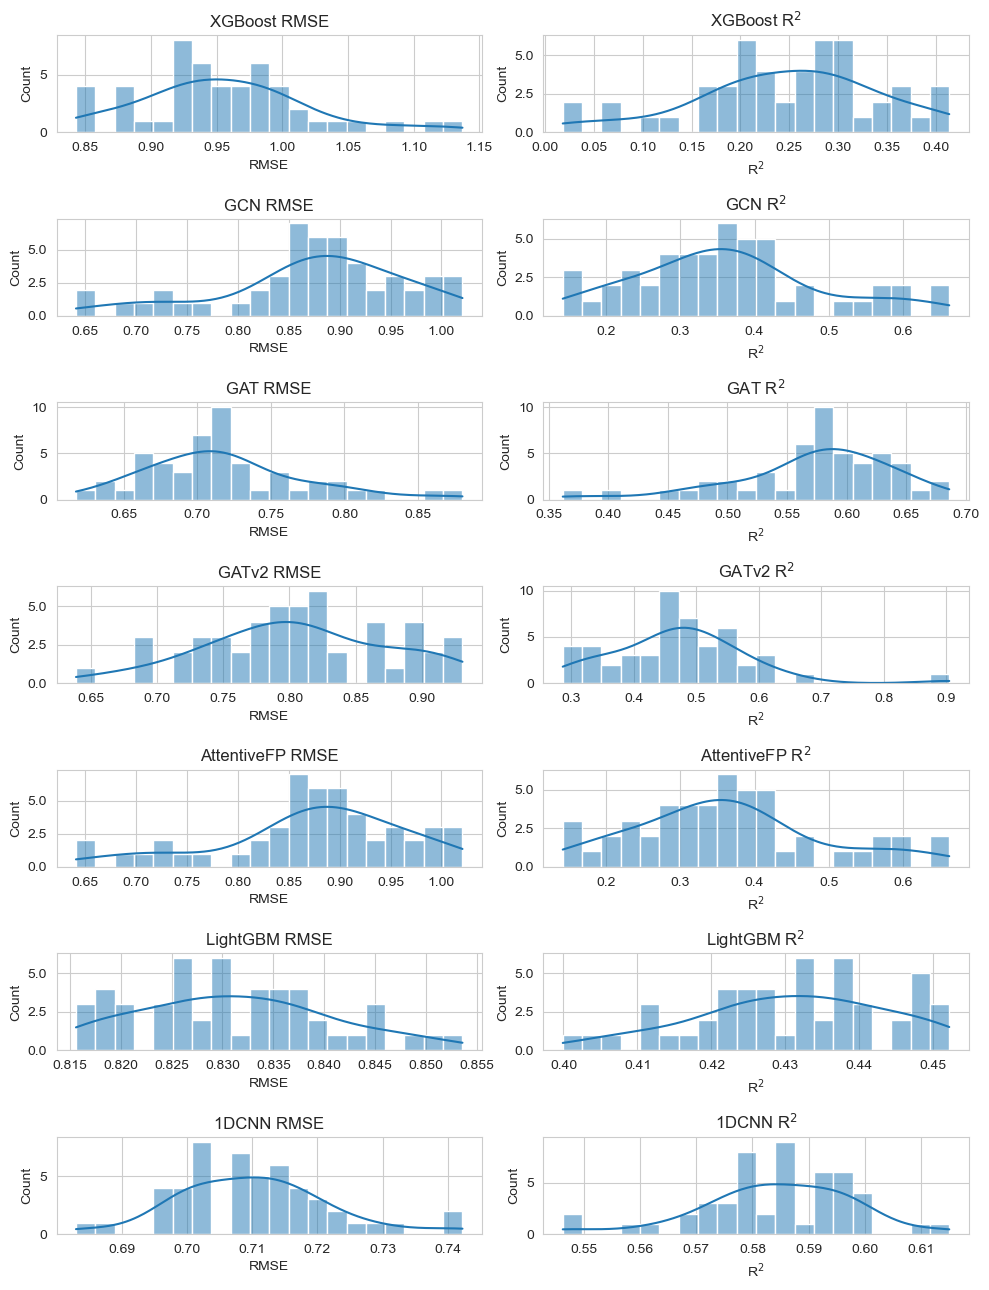

In [6]:
viz_dist(data_19SC1)

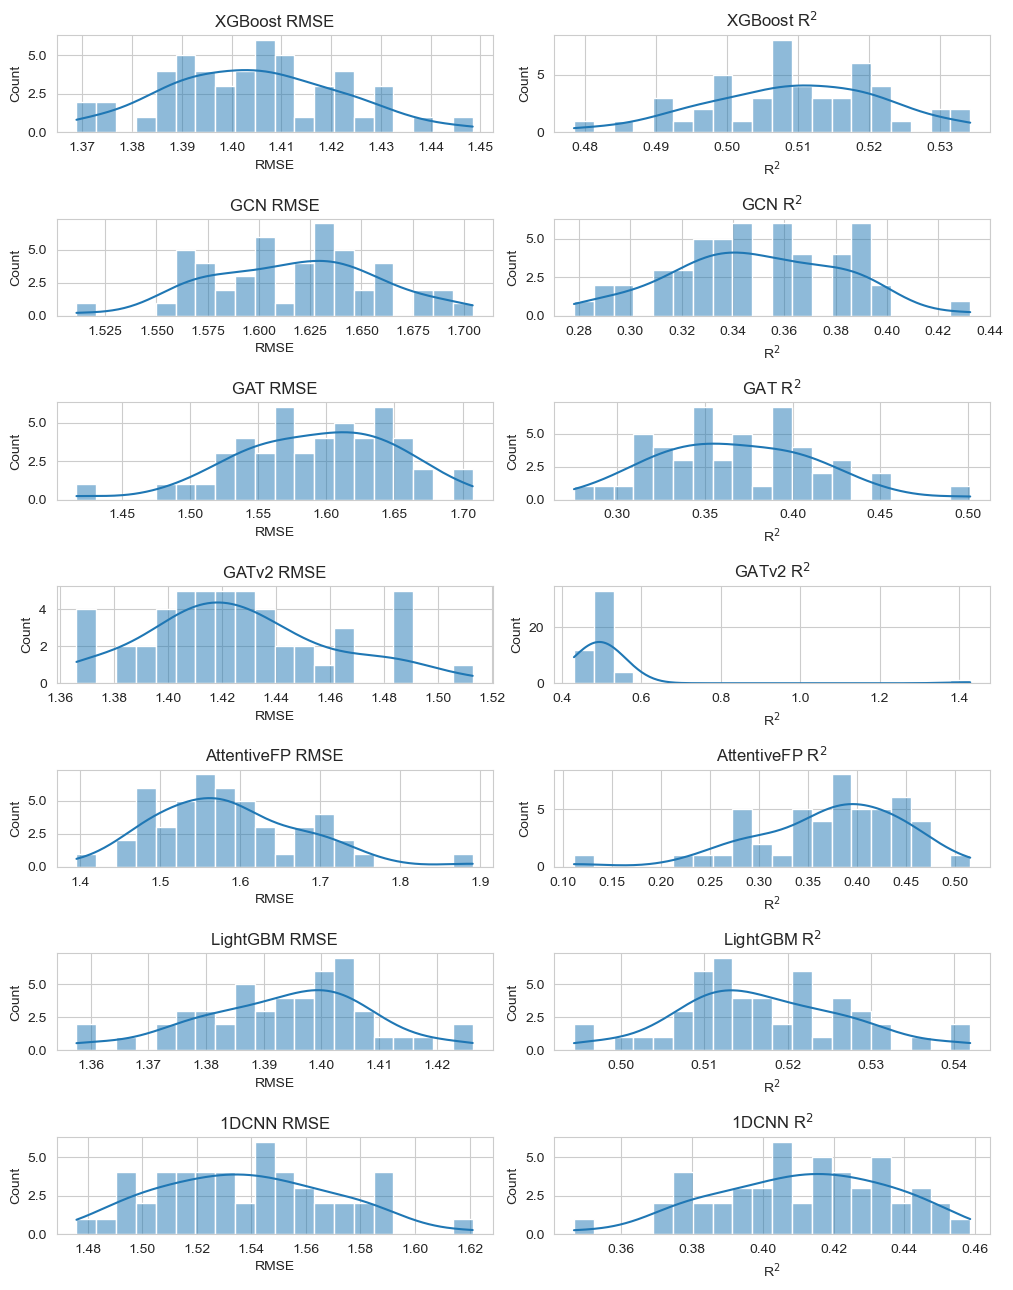

In [7]:
viz_dist(data_19SC2)

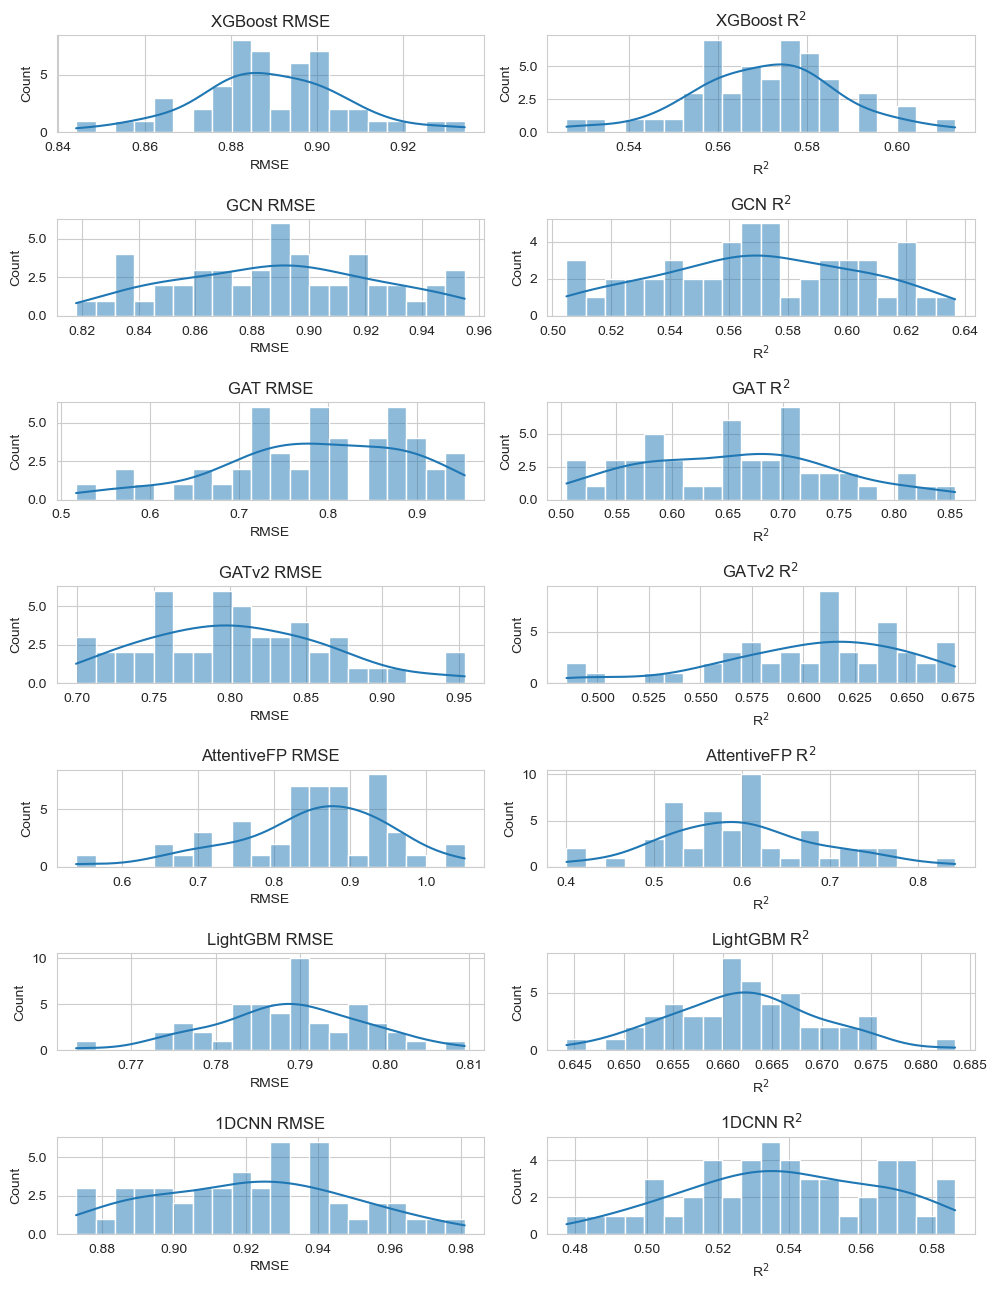

In [8]:
viz_dist(data_08SC)

T2

In [9]:
sp.posthoc_tamhane(data_08SC[["R$^2$", "Model"]], val_col='R$^2$', group_col='Model').sort_index().sort_index(axis=1)

,1dCNN,AttentiveFP,GAT,GATv2,GCN,LightGBM,MPNN,XGBoost
1dCNN,1.000000e+00,0.000181,3.482548e-12,1.498357e-12,2.109217e-05,0.000000e+00,1.536549e-13,4.731325e-09
AttentiveFP,1.809719e-04,1.000000,1.218179e-02,9.999904e-01,2.283552e-01,9.931687e-05,0.000000e+00,1.971395e-01
GAT,3.482548e-12,0.012182,1.000000e+00,1.906242e-03,6.303770e-08,9.999616e-01,0.000000e+00,3.986155e-08
GATv2,1.498357e-12,0.999990,1.906242e-03,1.000000e+00,4.014326e-04,3.463185e-11,0.000000e+00,4.422563e-05
GCN,2.109217e-05,0.228355,6.303770e-08,4.014326e-04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
LightGBM,0.000000e+00,0.000099,9.999616e-01,3.463185e-11,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
MPNN,1.536549e-13,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
XGBoost,4.731325e-09,0.197139,3.986155e-08,4.422563e-05,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [10]:
data = pd.read_csv("T2.csv")

In [25]:
def create_heatmap_with_significance(data, testset, metric, ax):
    data = data[data["Test Set"] == testset]
    metric_data = data[data['Metric'] == metric]

    # Get unique methods
    methods = sorted(set(metric_data['Method 1']).union(set(metric_data['Method 2'])))

    heatmap_matrix = np.full((len(methods), len(methods)), np.nan)
    annotations = np.empty((len(methods), len(methods)), dtype=object)

    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if method1 != method2:
                filtered_data = metric_data[(metric_data['Method 1'] == method1) & (metric_data['Method 2'] == method2)]
                if not filtered_data.empty:
                    p_value = filtered_data['p'].values[0]
                    significance = filtered_data['Significance'].values[0]
                    heatmap_matrix[i, j] = p_value
                    if p_value < 0.001:
                        annotations[i, j] = f'{p_value:.1e}\n{significance}' if not pd.isna(
                            significance) else f'{p_value:.1e}'
                    else:
                        annotations[i, j] = f'{p_value:.3f}\n{significance}' if not pd.isna(
                            significance) else f'{p_value:.3f}'

    sns.heatmap(heatmap_matrix, ax=ax, annot=annotations, fmt="", cmap='Blues_r', xticklabels=methods,
                yticklabels=methods, mask=np.isnan(heatmap_matrix), linewidths=0.5, linecolor='white')
    ax.text(x=0, y=-0.2, s=f"test set: {testset}, metric: {metric}", fontsize=13)

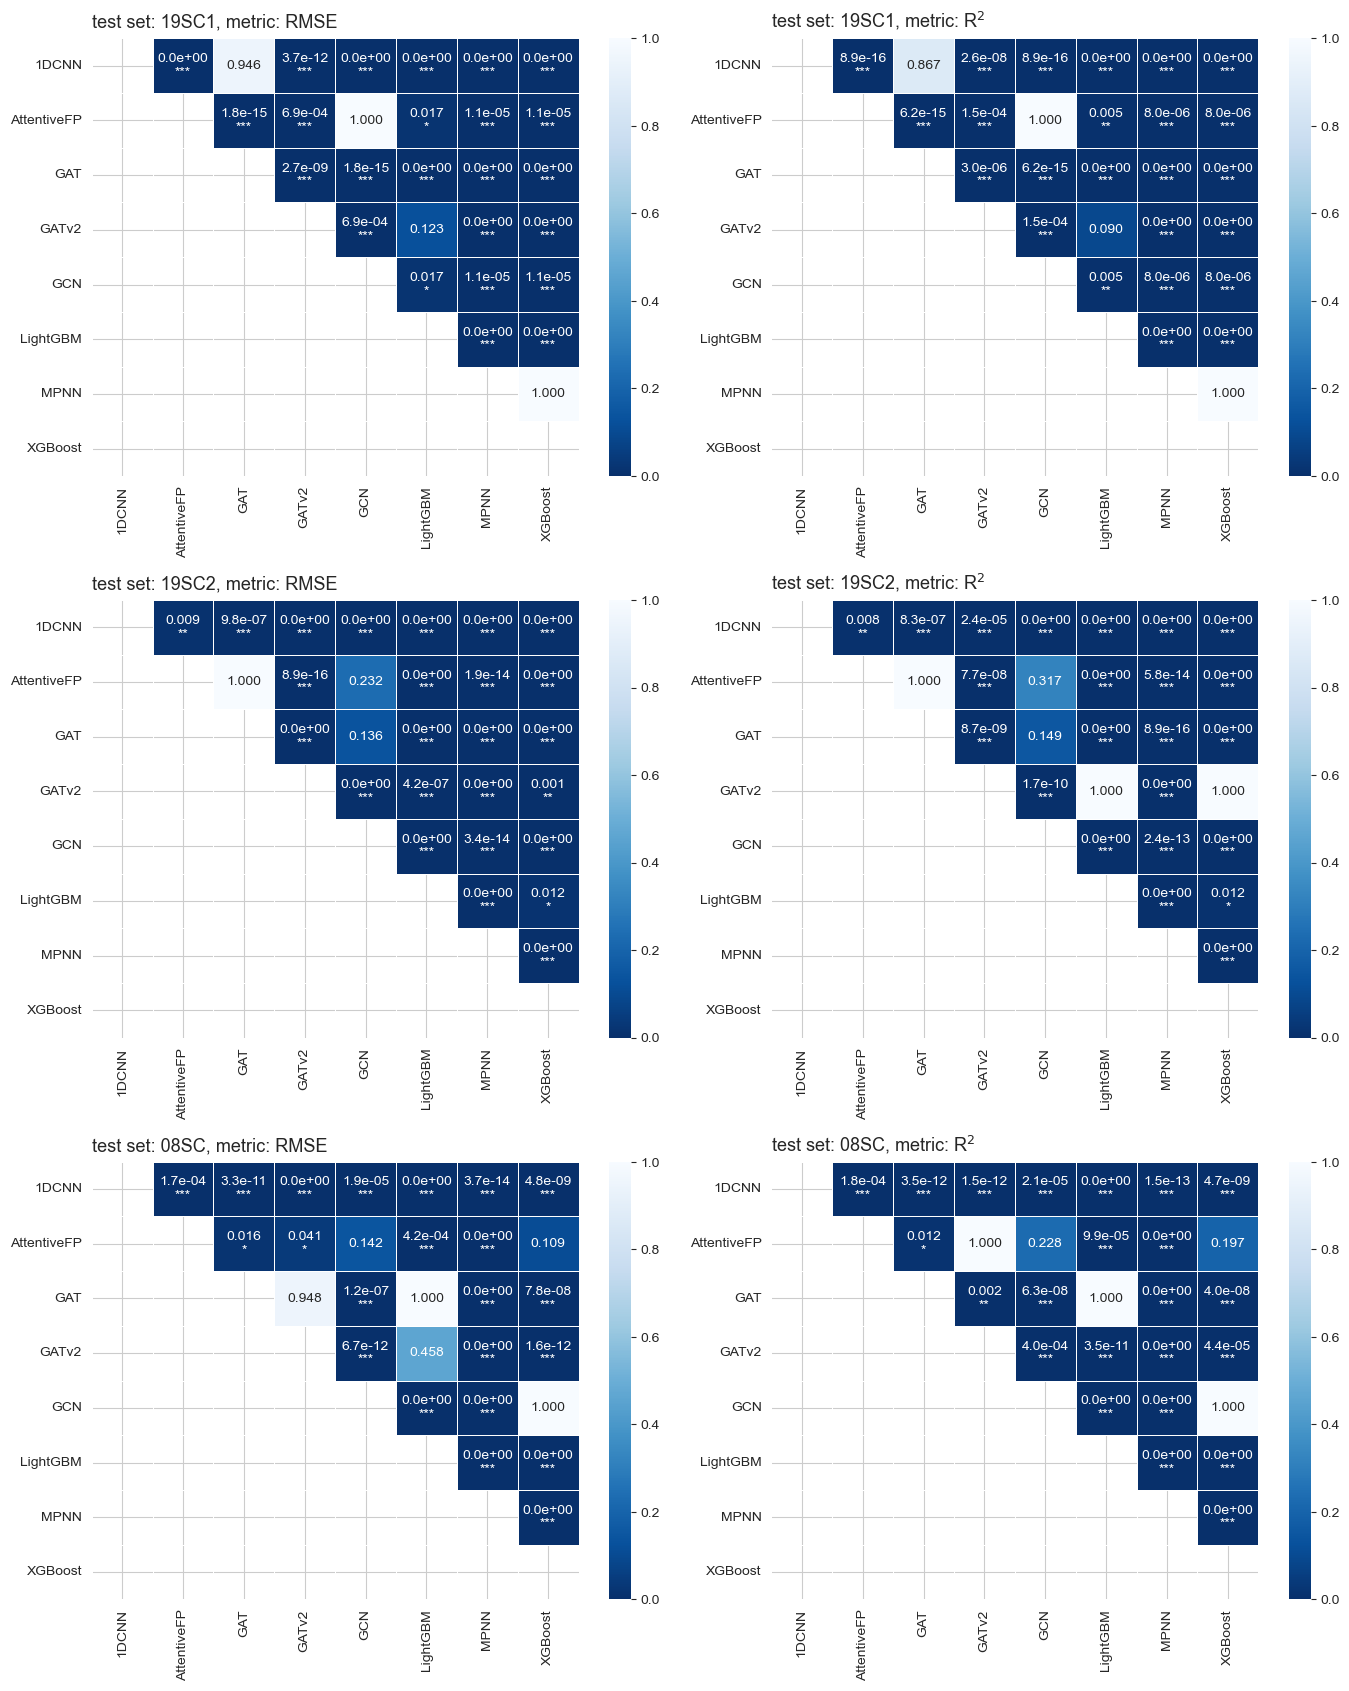

In [30]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 17))
create_heatmap_with_significance(data, "19SC1", 'RMSE', axs[0][0])
create_heatmap_with_significance(data, "19SC1", 'R$^2$', axs[0][1])
create_heatmap_with_significance(data, "19SC2", 'RMSE', axs[1][0])
create_heatmap_with_significance(data, "19SC2", 'R$^2$', axs[1][1])
create_heatmap_with_significance(data, "08SC", 'RMSE', axs[2][0])
create_heatmap_with_significance(data, "08SC", 'R$^2$', axs[2][1])
plt.tight_layout()

In [13]:
def create_heatmap_with_significance(data, testset, metric, ax):
    data = data[data["Test Set"] == testset]
    metric_data = data[data['Metric'] == metric]

    # Get unique methods
    methods = sorted(set(metric_data['Method 1']).union(set(metric_data['Method 2'])))

    heatmap_matrix = np.full((len(methods), len(methods)), np.nan)
    annotations = np.empty((len(methods), len(methods)), dtype=object)

    for i, method1 in enumerate(methods):
        for j, method2 in enumerate(methods):
            if method1 != method2:
                filtered_data = metric_data[(metric_data['Method 1'] == method1) & (metric_data['Method 2'] == method2)]
                if not filtered_data.empty:
                    p_value = filtered_data['p'].values[0]
                    significance = filtered_data['Significance'].values[0]
                    heatmap_matrix[i, j] = p_value
                    annotations[i, j] = f'{p_value:.3f}\n{significance}' if not pd.isna(
                        significance) else f'{p_value:.3f}'

    return heatmap_matrix

In [14]:
h1 = create_heatmap_with_significance(data, "19SC1", 'RMSE', axs[0][0])
h2 = create_heatmap_with_significance(data, "19SC1", 'R$^2$', axs[1][0])
h3 = create_heatmap_with_significance(data, "19SC2", 'RMSE', axs[0][1])
h4 = create_heatmap_with_significance(data, "19SC2", 'R$^2$', axs[1][1])
h5 = create_heatmap_with_significance(data, "08SC", 'RMSE', axs[0][2])
h6 = create_heatmap_with_significance(data, "08SC", 'R$^2$', axs[1][2])

<Axes: >

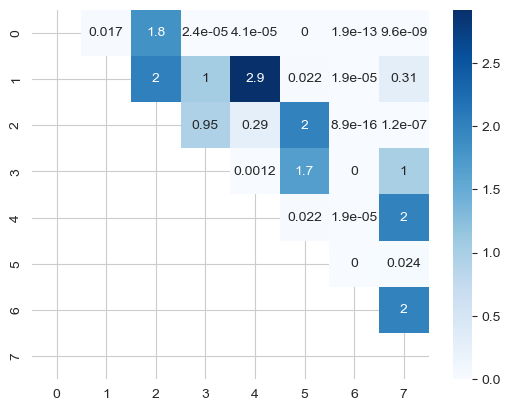

In [15]:
sns.heatmap(h1 + h2 + h3 + h4 + h5 + h6, annot=True, cmap="Blues")